In [1]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_power

In [2]:
# Read data
data_path = "../Data/fb100"

caltech = nx.read_gml(f"{data_path}/Caltech36.gml")
mit = nx.read_gml(f"{data_path}/MIT8.gml")
john_hopkins = nx.read_gml(f"{data_path}/Johns Hopkins55.gml")

In [3]:
# Calculate degree distribution function
def degree_distribution(graph):
    degree = [v for k,v in dict(graph.degree()).items()]
    distribution = [(elem, degree.count(elem)) for elem in sorted(set(degree))]
    k, pk = zip(*distribution)
    pdf = np.array(pk)/sum(pk)

    return pdf, k

# Plot degree distribution function
def plot_degree_distribution(pdf, k, dataset):
    plt.figure()
    plt.loglog(k, pdf, "ro")
    plt.xlabel("$k$ Degree")
    plt.ylabel("$P_k$")
    plt.title(f"{dataset} degree distribution")
    plt.show()

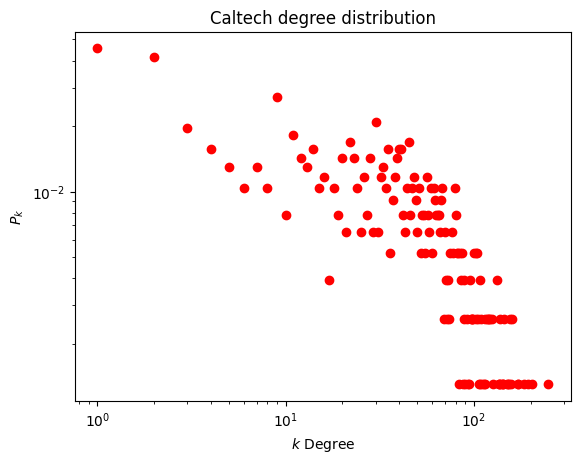

In [4]:
# Plot degree distribution Caltech
caltech_distribution, caltech_k = degree_distribution(caltech)
plot_degree_distribution(caltech_distribution, caltech_k, "Caltech")

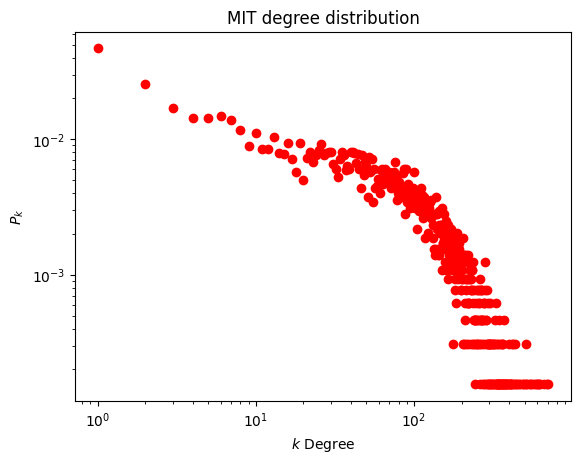

In [5]:
# Plot degree distribution MIT
mit_distribution, mit_k = degree_distribution(mit)
plot_degree_distribution(mit_distribution, mit_k, "MIT")

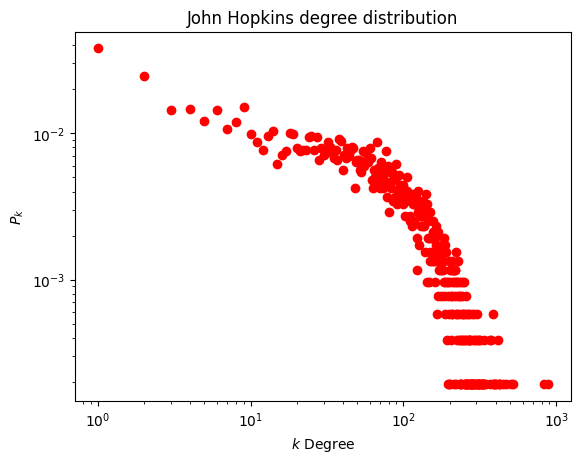

In [6]:
# Plot degree distribution John Hopkins
john_hopkins_distribution, john_hopkins_k = degree_distribution(john_hopkins)
plot_degree_distribution(john_hopkins_distribution, john_hopkins_k, "John Hopkins")

In [7]:
# Calculate clustering coefficient of one vertex function
def vertex_clustering_coefficient(graph, vertex):
    v_neighbors = list(graph.neighbors(vertex))
    n_neighbors = len(v_neighbors)
    
    if n_neighbors < 2:
        return 0.0
    
    neighbor_subgraph = graph.subgraph(v_neighbors)
    actual_edges = neighbor_subgraph.number_of_edges()
    max_edges = (n_neighbors * (n_neighbors - 1)) / 2
    
    return actual_edges / max_edges if max_edges > 0 else 0.0

# Calculate clustering coefficient of the graph function
def graph_clustering_coefficient(graph):
    clustering_coefficients = [vertex_clustering_coefficient(graph, node) 
                             for node in graph.nodes()]
    return np.mean(clustering_coefficients)

# Calculate global clustering coefficient
def global_clustering_coefficient(adjacent_matrix):
    num_triangle = (1/6) * np.trace(matrix_power(adjacent_matrix, 3))
    adjacent_matrix_2 = matrix_power(adjacent_matrix, 2)
    sum_adjacent_matrix_2 = adjacent_matrix_2.sum()
    trace_adjacent_matrix_2 = np.trace(adjacent_matrix_2)
    num_triple = (1/2) * (sum_adjacent_matrix_2 - trace_adjacent_matrix_2)
    return 3 * num_triangle / num_triple

# Calculate the edge density function
def edge_density(graph):
    nodes = graph.number_of_nodes()
    edges = graph.number_of_edges()
    density = edges / (nodes * (nodes - 1))
    return density

In [8]:
# Calculate local clustering coefficient Caltech
caltech_local_clustering_coefficient = graph_clustering_coefficient(caltech)
print(f"Local clustering coefficient Caltech: {caltech_local_clustering_coefficient}")

# Calculate global clustering coefficient Caltech
caltech_adjacent_matrix = nx.adjacency_matrix(caltech).toarray()
caltech_global_clustering_coefficient = global_clustering_coefficient(caltech_adjacent_matrix)
print(f"Global clustering coefficient Caltech: {caltech_global_clustering_coefficient}")

# Calulate edge density Caltech
caltech_density = edge_density(caltech)
print(f"Edge density Caltech: {caltech_density}")

Local clustering coefficient Caltech: 0.4092943904851723
Global clustering coefficient Caltech: 0.2912826901150874
Edge density Caltech: 0.02820221066319896


In [ ]:
# Calculate local clustering coefficient MIT
mit_local_clustering_coefficient = graph_clustering_coefficient(mit)
print(f"Local clustering coefficient MIT: {mit_local_clustering_coefficient}")

# Calculate global clustering coefficient MIT
mit_adjacent_matrix = nx.adjacency_matrix(mit).toarray()
mit_global_clustering_coefficient = global_clustering_coefficient(mit_adjacent_matrix)
print(f"Global clustering coefficient MIT: {mit_global_clustering_coefficient}")

# Calulate edge density MIT
mit_density = edge_density(mit)
print(f"Edge density MIT: {mit_density}")

Local clustering coefficient MIT: 0.271218741950132
6440


In [ ]:
# Calculate local clustering coefficient Johns Hopkins
john_hopkins_local_clustering_coefficient = graph_clustering_coefficient(john_hopkins)
print(f"Local clustering coefficient Johns Hopkins: {john_hopkins_local_clustering_coefficient}")

# Calculate global clustering coefficient Johns Hopkins
john_hopkins_adjacent_matrix = nx.adjacency_matrix(john_hopkins).toarray()
john_hopkins_global_clustering_coefficient = global_clustering_coefficient(john_hopkins_adjacent_matrix)
print(f"Global clustering coefficient Johns Hopkins: {john_hopkins_global_clustering_coefficient}")

# Calulate edge density Johns Hopkins
john_hopkins_density = edge_density(john_hopkins)
print(f"Edge density Johns Hopkins: {john_hopkins_density}")